## EDA
1. DATA CHECKS
    - Check Missing values
    - Check Duplicates
    - Check data type
    - Check the number of unique values of each column
    - Check statistics of data set
    - Check various categories present in the different categorical column

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## CATEGORIES

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print(f"Categories in Gender is:  {df['gender'].unique()}", end='\n\n')
print(f"Categories in race are: {df['race/ethnicity'].unique()}", end='\n\n')
print(f"Categories in Parental Education are  {df['parental level of education'].unique()}", end='\n\n')
print(f"Categoreis in lunch are {df['lunch'].unique()}", end='\n\n')
print(f"Categories in Test are {df['test preparation course'].unique()}", end='\n\n')

Categories in Gender is:  ['female' 'male']

Categories in race are: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in Parental Education are  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categoreis in lunch are ['standard' 'free/reduced']

Categories in Test are ['none' 'completed']



## Dividing  Features

In [27]:
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
cat_features = [features for features in df.columns if df[features].dtype == 'O']

In [28]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

## TOTAL and AVERAGE

In [29]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [38]:
reading_full = df[df['reading score']==100]['avg_score'].count()

In [52]:
reading_full = df[df['reading score']==100]['avg_score'].count()
math_full = df[df['math score']==100]['avg_score'].count()
writing_full = df[df['writing score']==100]['avg_score'].count()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [55]:
reading_less_20 = df[df['reading score'] <= 20]['avg_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['avg_score'].count()
math_less_20 = df[df['math score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


In [64]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## VISUALIZATION

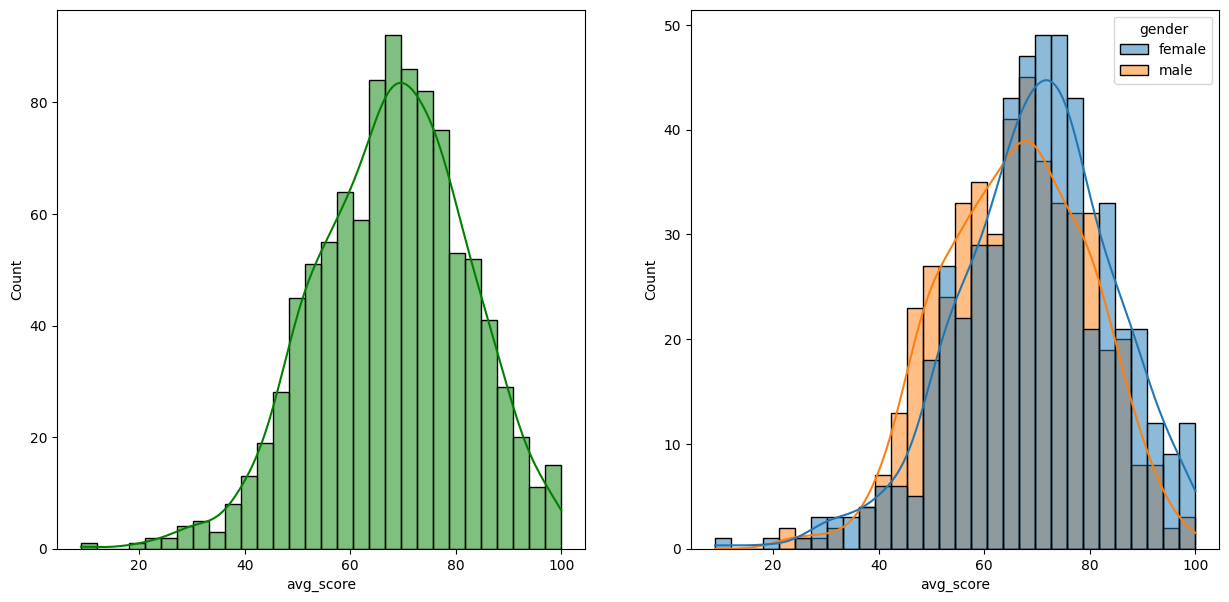

In [70]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='g' )
plt.subplot(122)
sns.histplot(data=df, x='avg_score', kde=True, bins=30, color='r', hue='gender')
plt.show()

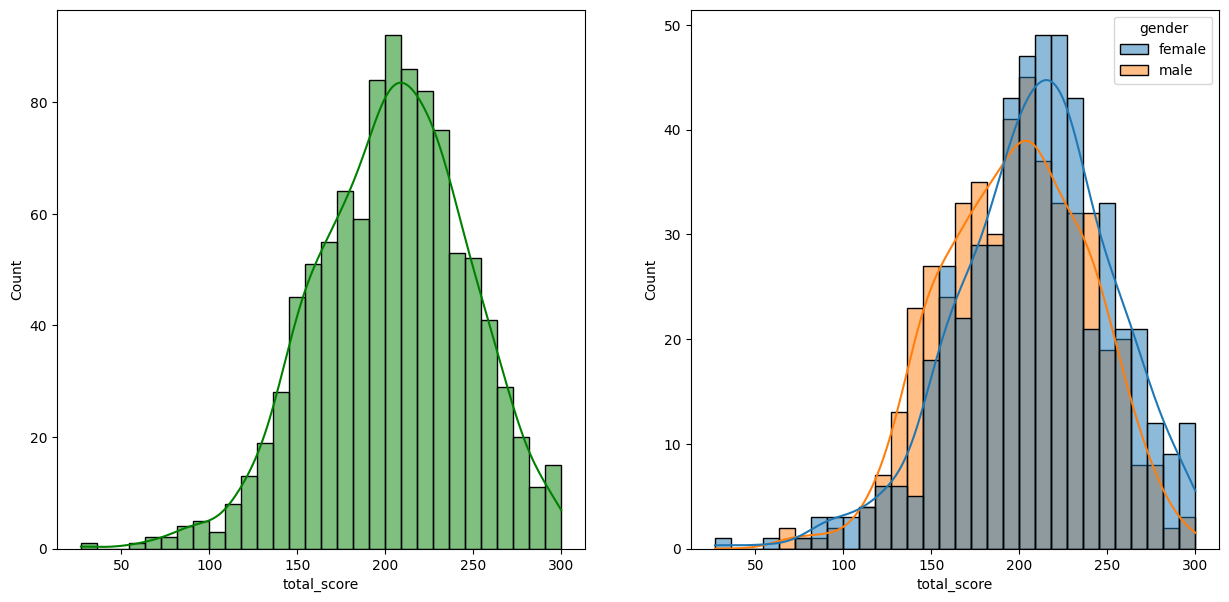

In [71]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g' )
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, bins=30, color='r', hue='gender')
plt.show()

### LUNCH + AVG_SCORE

<Axes: xlabel='avg_score', ylabel='Count'>

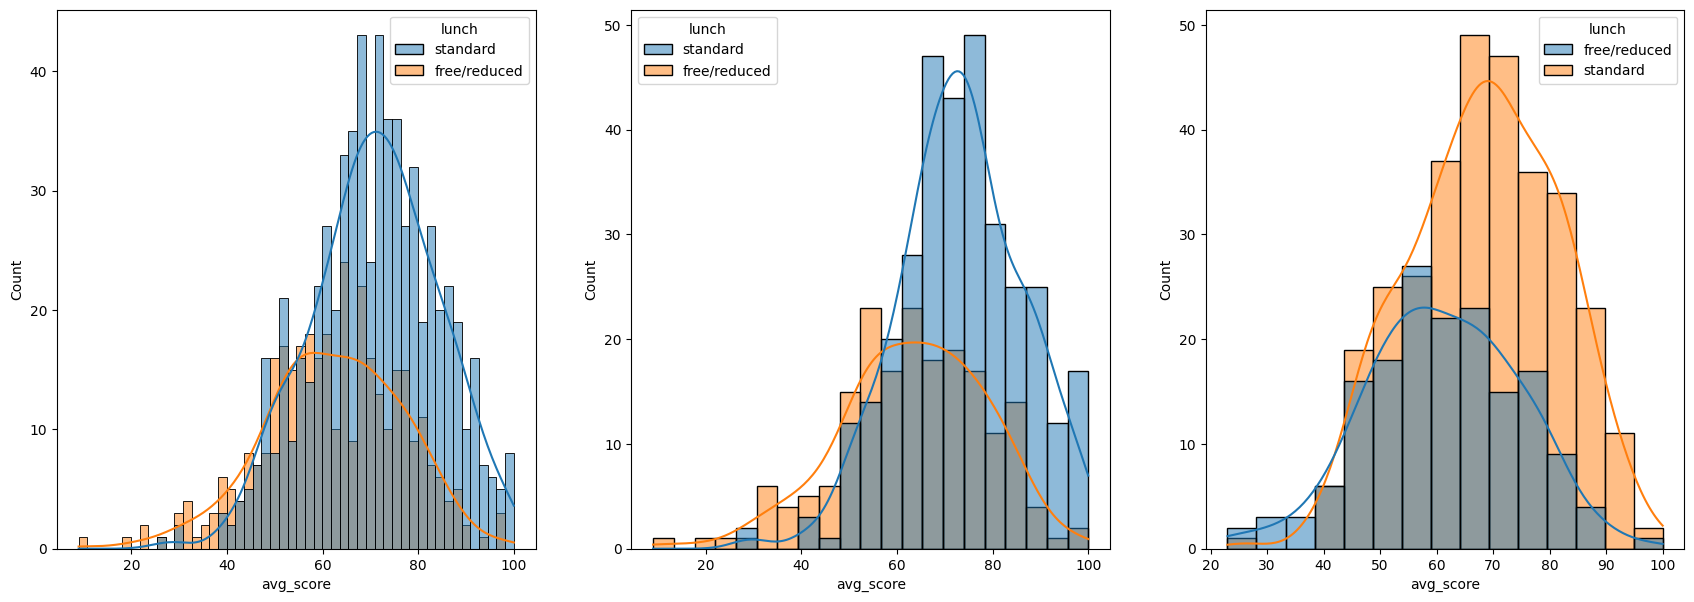

In [76]:
plt.subplots(1, 3, figsize= (21,7))
plt.subplot(131)
sns.histplot(data=df, x='avg_score', kde=True, bins=50, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='avg_score', kde=True, hue='lunch' )
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='avg_score', kde=True, hue='lunch' )

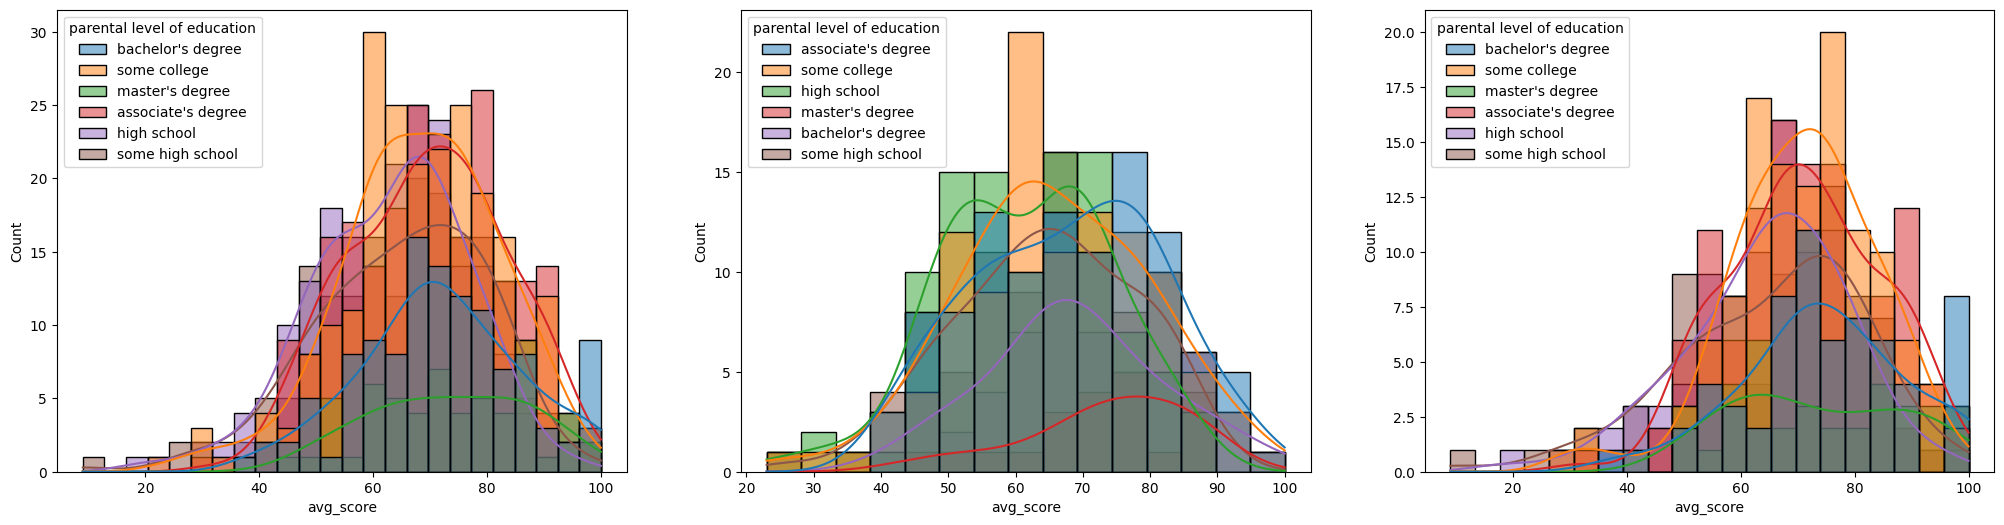

In [78]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental level of education')
plt.show()

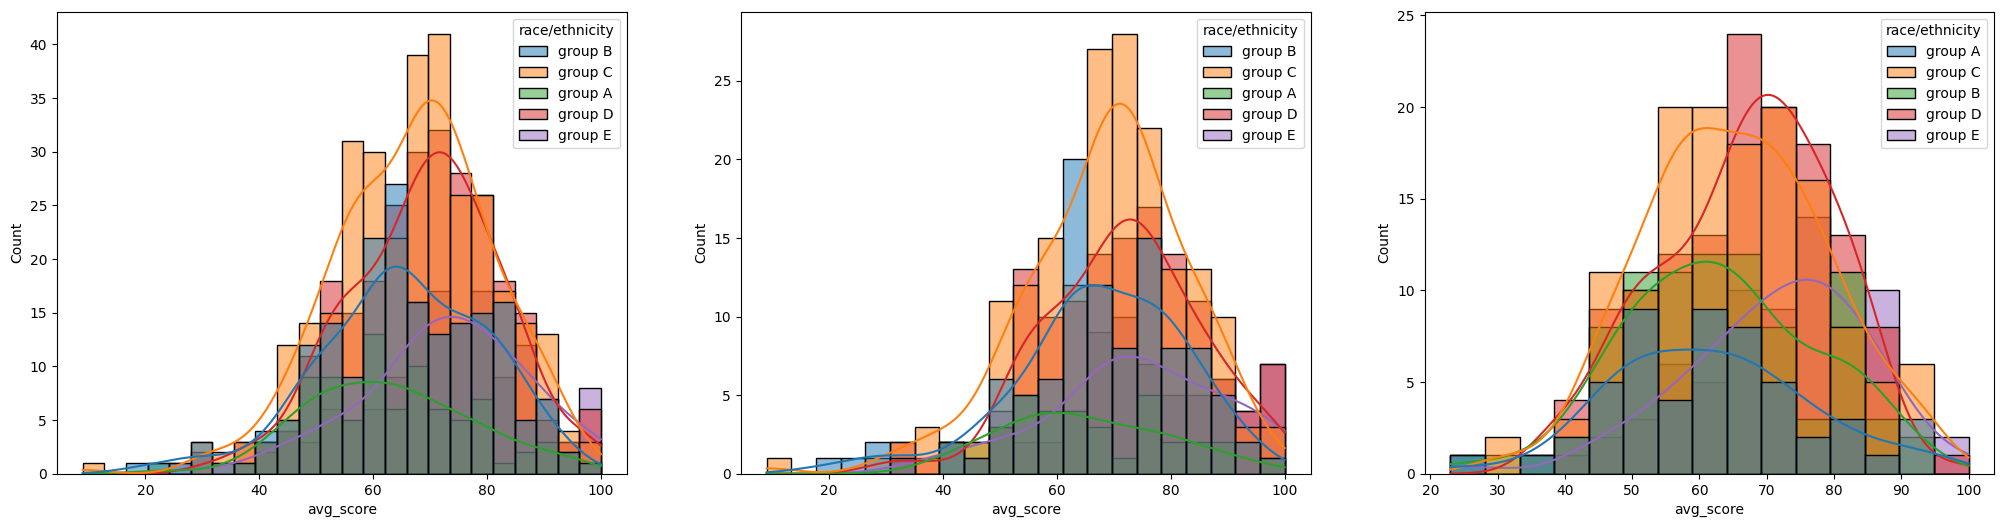

In [81]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race/ethnicity')
plt.show()